In [24]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [25]:
data = pd.read_csv('~/Desktop/project_data_new/embedding_768_TCGA_COAD.csv')
data.index = data['PatientID']
# drop last 2 columns
data = data.drop(data.columns[-2:], axis=1)
data

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
PatientID,,,,,,,,,,,,,,,,,,,,,
TCGA-A6-6650,-0.457220,0.851885,0.540813,-0.423622,0.714115,-0.564329,1.607602,0.543431,-0.870704,0.980508,...,0.673500,0.445102,0.272053,0.577840,-0.313309,0.463409,0.216033,1.875605,-0.811024,-1.250726
TCGA-A6-6142,-0.387709,0.730046,0.720710,-0.723050,0.841878,-0.463233,1.442049,0.573482,-0.817522,1.146394,...,0.287993,0.639623,0.308657,0.696497,-0.164076,0.249183,0.075877,2.179679,-0.814272,-1.311477
TCGA-5M-AAT4,-0.430112,0.766393,0.768542,-0.344121,0.560576,-0.597754,1.708495,0.419003,-0.934103,1.152953,...,0.578889,0.539531,0.399675,0.471158,-0.089670,0.701613,0.178599,1.802830,-0.844305,-1.300183
TCGA-A6-2676,-0.417006,0.964753,0.525541,-0.572356,0.777732,-0.462124,1.476457,0.640170,-0.722137,1.066126,...,0.475959,0.557490,0.094860,0.659872,-0.243587,0.122108,0.107965,2.146043,-0.946326,-1.345658
TCGA-A6-6652,-0.276354,0.766071,0.612194,-0.596442,0.814464,0.016801,1.598807,0.929635,-0.914753,1.071625,...,0.395806,0.545849,0.290805,0.229333,-0.536335,0.017757,-0.074384,2.026599,-0.776906,-0.934953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-G4-6321,-0.359843,0.929950,0.543955,-0.350527,0.404216,-0.566966,1.688820,0.196331,-1.050643,1.162059,...,0.802867,0.499934,0.404179,0.325667,-0.166769,0.612408,0.197617,1.686868,-0.917694,-1.251037
TCGA-RU-A8FL,-0.480253,0.931134,0.455165,-0.714430,0.685353,-0.373306,1.511218,0.747226,-0.652520,0.907837,...,0.179997,0.744851,0.062442,0.249245,-0.573766,-0.159084,-0.157464,2.173445,-0.916892,-1.098334
TCGA-G4-6303,-0.397405,0.793659,0.682602,-0.526544,0.733674,-0.456034,1.593480,0.500975,-0.982290,1.068642,...,0.514841,0.515760,0.324934,0.458768,-0.172873,0.498273,0.168238,1.823696,-0.805411,-1.238766


## remove the features that are highly correlated

In [27]:
import pandas as pd
import numpy as np

# Step 1: Calculate the correlation matrix
corr_matrix = data.corr().abs()  # Compute the absolute correlation matrix

# Step 2: Identify the upper triangle of the correlation matrix
upper_triangle = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)  # Upper triangle of the matrix

# Step 3: Identify pairs of features with a correlation higher than 0.8
high_corr_pairs = corr_matrix.where(upper_triangle) > 0.8

# Step 4: Get columns (features) to drop
to_drop = [column for column in corr_matrix.columns if any(high_corr_pairs[column])]

# Step 5: Drop the highly correlated features (columns)
data_reduced = data.drop(columns=to_drop, axis=1)  # Ensure axis=1 to drop columns, not rows

# Output the resulting data shape
print(f"Original shape: {data.shape}")
print(f"Reduced shape after removing highly correlated features: {data_reduced.shape}")
data = data_reduced


Original shape: (460, 768)
Reduced shape after removing highly correlated features: (460, 317)


In [3]:
data_target = pd.read_csv('~/Desktop/project_data_new/target_768_avg_expanded.csv')

In [4]:
data_target.index = data_target['Unnamed: 0']
data_target = data_target.drop(['Unnamed: 0'], axis = 1)
# only keep the columns with category in the name
data_target = data_target.loc[:, data_target.columns.str.contains('category')]
data_target

,category_tnk_1,category_tnk_2,category_tnk_3,category_tnk_4,category_tnk_5,category_tnk_6,category_tnk_7,category_tnk_8,category_tnk_9,category_tnk_10,...,category_stromal_62,category_stromal_63,category_stromal_64,category_stromal_65,category_stromal_66,category_stromal_68,category_stromal_73,category_stromal_78,category_stromal_80,category_stromal_85
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
TCGA-A6-6650,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,...,-1,-1,-1,-1,-1,1,-1,-1,1,1
TCGA-A6-6142,1,1,0,0,0,0,0,0,-1,0,...,1,1,1,1,1,-1,0,0,-1,-1
TCGA-5M-AAT4,-1,-1,-1,0,-1,-1,-1,-1,1,-1,...,-1,-1,-1,-1,-1,1,-1,-1,1,1
TCGA-A6-2676,1,1,1,0,1,1,1,1,1,1,...,0,-1,0,-1,0,1,0,1,1,1
TCGA-A6-6652,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-G4-6321,1,1,1,-1,1,1,1,1,-1,1,...,0,0,-1,1,1,-1,1,1,-1,-1
TCGA-RU-A8FL,-1,-1,-1,1,-1,-1,-1,-1,1,-1,...,-1,-1,-1,-1,-1,1,-1,-1,1,1
TCGA-G4-6303,-1,0,-1,-1,0,0,0,-1,-1,1,...,1,1,1,0,1,-1,0,0,-1,-1


In [28]:
data = data[data.index.isin(data_target.index)]
data.shape

(449, 317)

In [29]:
# Convert dataframes to NumPy arrays if they aren't already
# estimator__max_depth': 30, 'estimator__max_features': 'sqrt', 'estimator__min_samples_split': 9, 'estimator__n_estimators': 288
X = data.values
Y = data_target.values

# Split the dataset into training and testing sets
# Adjust test_size as needed (e.g., 20% for testing)
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(
    n_estimators=288,  # Number of trees in the forest
    max_depth=30, # Try 10, 20, or 30
    random_state=42,
    max_features='sqrt',  # Number of features to consider at each split
    class_weight='balanced',  # Helps with imbalanced classes
    n_jobs=-1          # Use all available cores
)

# Wrap the classifier with MultiOutputClassifier
multi_output_clf = MultiOutputClassifier(rf_classifier)

# Fit the model on the training data
multi_output_clf.fit(X_train, Y_train)

# Predict on the test data
Y_pred = multi_output_clf.predict(X_test)



In [ ]:
# Import the necessary libraries
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import train_test_split
from scipy.stats import randint
import numpy as np

# Convert dataframes to NumPy arrays if they aren't already
X = data.values
Y = data_target.values

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

# Define the RandomForestClassifier
rf_classifier = RandomForestClassifier(
    n_estimators=150,  # You can later tune this
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Wrap the classifier with MultiOutputClassifier
multi_output_clf = MultiOutputClassifier(rf_classifier)

# Define the parameter distribution for RandomizedSearchCV
param_distributions = {
    'estimator__n_estimators': randint(100, 300),  # Tuning n_estimators
    'estimator__max_depth': [None] + list(range(10, 50, 10)),  # Tuning max_depth
    'estimator__min_samples_split': randint(2, 11),  # Tuning min_samples_split
    'estimator__max_features': ['sqrt', 'log2']  # Tuning max_features
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=multi_output_clf,
    param_distributions=param_distributions,
    n_iter=30,  # Number of random combinations
    cv=3,  # 3-fold cross-validation
    scoring='f1_weighted',  # Evaluation metric
    n_jobs=-1,  # Parallelization
    random_state=42
)

# Fit the model on the training data
random_search.fit(X_train, Y_train)

# Get the best parameters
print("Best parameters found:")
print(random_search.best_params_)
# Best parameters found:
# {'estimator__max_depth': 30, 'estimator__max_features': 'sqrt', 'estimator__min_samples_split': 9, 'estimator__n_estimators': 288}
best_model = random_search.best_estimator_
Y_pred = best_model.predict(X_test)

In [30]:
# Evaluate the model
for i in range(Y_test.shape[1]):
    y_true = Y_test[:, i]
    y_pred = Y_pred[:, i]
    
    # Get the GEM category name
    target_name = data_target.columns[i] if isinstance(data_target, pd.DataFrame) else f'category_{i}'
    
    print(f"Classification report for {target_name}:")
    
    # Get the unique labels for this category
    unique_labels = np.unique(y_true)
    
    # Define target names based on the unique labels
    if len(unique_labels) == 2:
        # Binary classification (labels 0 and 1)
        labels = unique_labels
        target_names = [f'Not {target_name}', target_name]
    else:
        # Multiclass classification
        labels = unique_labels
        target_names = [f'{target_name}_{label}' for label in labels]
    
    # Generate the classification report
    report = classification_report(
        y_true,
        y_pred,
        labels=labels,
        target_names=target_names,
        zero_division=0
    )
    print(report)


Classification report for category_tnk_1:
                   precision    recall  f1-score   support

category_tnk_1_-1       0.53      0.53      0.53        30
 category_tnk_1_0       0.43      0.34      0.38        29
 category_tnk_1_1       0.35      0.42      0.38        31

         accuracy                           0.43        90
        macro avg       0.44      0.43      0.43        90
     weighted avg       0.44      0.43      0.43        90

Classification report for category_tnk_2:
                   precision    recall  f1-score   support

category_tnk_2_-1       0.50      0.48      0.49        29
 category_tnk_2_0       0.45      0.52      0.48        29
 category_tnk_2_1       0.48      0.44      0.46        32

         accuracy                           0.48        90
        macro avg       0.48      0.48      0.48        90
     weighted avg       0.48      0.48      0.48        90

Classification report for category_tnk_3:
                   precision    recall  f1

In [19]:
# save report to file
with open('classification_report.txt', 'w') as f:
    for i in range(Y_test.shape[1]):
        y_true = Y_test[:, i]
        y_pred = Y_pred[:, i]

        # Get the GEM category name
        target_name = data_target.columns[i] if isinstance(data_target, pd.DataFrame) else f'category_{i}'

        f.write(f"Classification report for {target_name}:\n")

        # Get the unique labels for this category
        unique_labels = np.unique(y_true)

        # Define target names based on the unique labels
        if len(unique_labels) == 2:
            # Binary classification (labels 0 and 1)
            labels = unique_labels
            target_names = [f'Not {target_name}', target_name]
        else:
            # Multiclass classification
            labels = unique_labels
            target_names = [f'{target_name}_{label}' for label in labels]

        # Generate the classification report
        report = classification_report(
            y_true,
            y_pred,
            labels=labels,
            target_names=target_names,
            zero_division=0
        )
        f.write(report)
        f.write('\n\n')

        

In [41]:
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score

# Ensure Y_test and Y_pred are NumPy arrays
Y_test = np.array(Y_test)
Y_pred = np.array(Y_pred)

# Initialize lists to store F1-scores and category names
f1_scores = []
category_names = []

num_categories = Y_test.shape[1]

for i in range(num_categories):
    y_true = Y_test[:, i]
    y_pred = Y_pred[:, i]
    
    # Compute F1-score for the current category
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    f1_scores.append(f1)
    
    # Get the category name
    if isinstance(data_target, pd.DataFrame):
        category_name = data_target.columns[i]
    else:
        category_name = f'Category_{i}'
    category_names.append(category_name)

# Create a DataFrame
f1_df = pd.DataFrame({
    'GEM_Category': category_names,
    'F1_Score': f1_scores
})

# Optionally, sort the DataFrame by F1-score
f1_df = f1_df.sort_values(by='F1_Score', ascending=False).reset_index(drop=True)


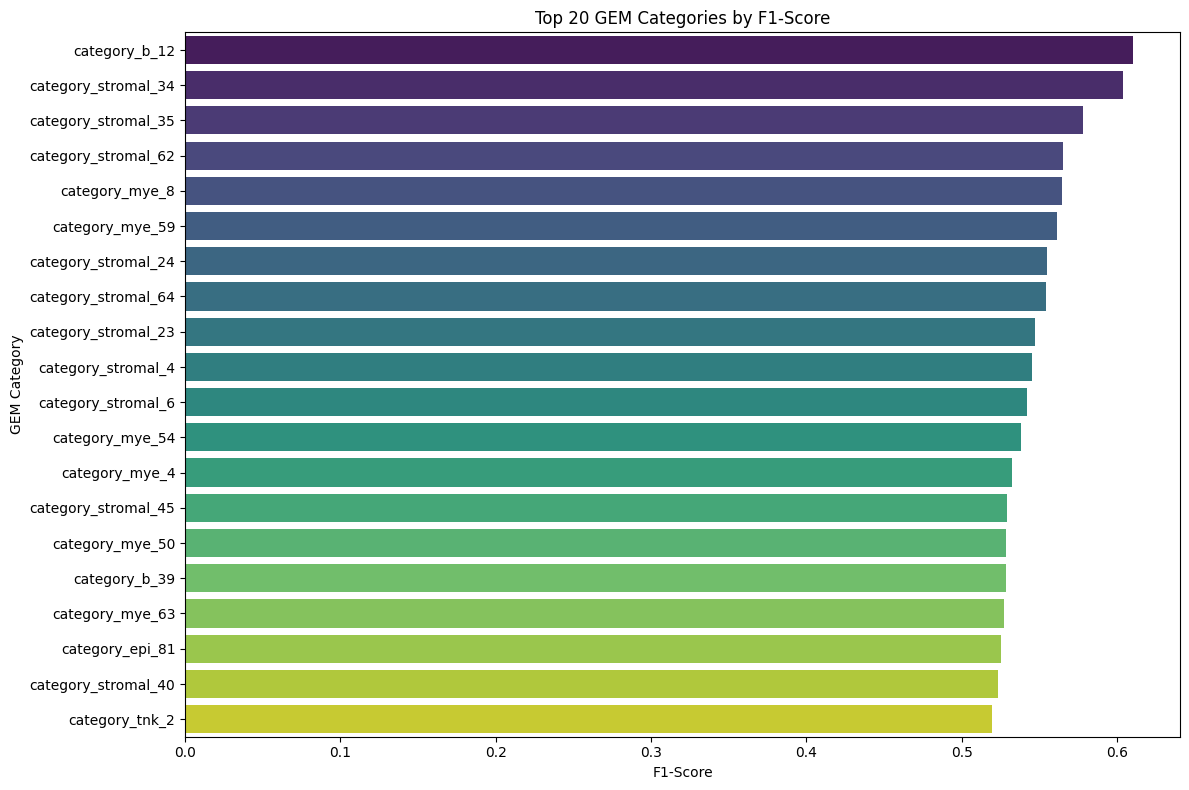

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the number of top categories to plot
N = 20  # Adjust N as needed

# Get the top N categories
top_f1_df = f1_df.head(N)

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a horizontal bar plot
sns.barplot(
    data=top_f1_df,
    x='F1_Score',
    y='GEM_Category',
    palette='viridis'
)

# Add labels and title
plt.xlabel('F1-Score')
plt.ylabel('GEM Category')
plt.title(f'Top {N} GEM Categories by F1-Score')

# Adjust layout to prevent labels from being cut off
plt.tight_layout()

# Show the plot
plt.show()


In [22]:
import joblib

# Save the random_search object to a file
joblib.dump(random_search, 'random_search.pkl')

['random_search.pkl']

## use random forest to find the best 100 features

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
import numpy as np

# Convert dataframes to NumPy arrays if they aren't already
X = data.values
Y = data_target.values

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

# Define the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42, n_jobs=-1)



# Wrap the classifier with MultiOutputClassifier
multi_output_clf = MultiOutputClassifier(rf_classifier)

# Perform RandomizedSearchCV to find the best hyperparameters
random_search = RandomizedSearchCV(
    estimator=multi_output_clf,
    param_distributions={
        'estimator__n_estimators': [100, 200, 300, 400, 500],
        'estimator__max_depth': [10, 20, 30, 40, 50],
        'estimator__min_samples_split': [2, 5, 10],
        'estimator__max_features': ['sqrt', 'log2']
    },
    n_iter=10,  # Number of different hyperparameter combinations to try
    cv=3,  # 3-fold cross-validation
    scoring='f1_weighted',  # Use F1 weighted score for multi-output
    n_jobs=-1,
    random_state=42
)

# Step 1: Fit RandomizedSearchCV on training data
random_search.fit(X_train, Y_train)

# Step 2: Retrieve the best model from RandomizedSearchCV
best_model = random_search.best_estimator_

# Step 3: Extract feature importances from the best estimator (use the first estimator as an example)
# We assume feature importance from the first target model
feature_importances = best_model.estimators_[0].feature_importances_

# Step 4: Sort features by importance and select the top 100 features
indices = np.argsort(feature_importances)[::-1]  # Sort in descending order
top_n = 100  # Select top 100 features
top_100_indices = indices[:top_n]

# Step 5: Reduce the training and testing data to only the top 100 features
X_train_top_100 = X_train[:, top_100_indices]
X_test_top_100 = X_test[:, top_100_indices]

# Output the selected top 100 feature indices and their corresponding importances (optional)
selected_feature_importances = feature_importances[top_100_indices]
print("Top 100 selected features and their importances:")
for idx, importance in zip(top_100_indices, selected_feature_importances):
    print(f"Feature {idx} - Importance: {importance}")

# Step 6: Retrain the final model on the selected top 100 features using the best hyperparameters
final_rf_classifier = RandomForestClassifier(
    n_estimators=random_search.best_params_['estimator__n_estimators'],
    max_depth=random_search.best_params_['estimator__max_depth'],
    min_samples_split=random_search.best_params_['estimator__min_samples_split'],
    max_features=random_search.best_params_['estimator__max_features'],
    random_state=42,
    n_jobs=-1
)

# Wrap it with MultiOutputClassifier
final_multi_output_clf = MultiOutputClassifier(final_rf_classifier)

# Fit the model using only the top 100 selected features
final_multi_output_clf.fit(X_train_top_100, Y_train)

# Step 7: Predict on the test set using the final model
Y_pred = final_multi_output_clf.predict(X_test_top_100)

# (Optional) Evaluate the model using classification metrics


/home/qiuaodon/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/qiuaodon/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/qiuaodon/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/qiuaodon/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 350, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^

Top 100 selected features and their importances:
Feature 105 - Importance: 0.008239940819003443
Feature 198 - Importance: 0.007860412444717335
Feature 237 - Importance: 0.007623165260945086
Feature 258 - Importance: 0.007558447504595332
Feature 140 - Importance: 0.006520095284416859
Feature 303 - Importance: 0.006410508059249908
Feature 0 - Importance: 0.0060046856845136585
Feature 266 - Importance: 0.005818901603188372
Feature 96 - Importance: 0.005789250775369861
Feature 183 - Importance: 0.005759307208017098
Feature 205 - Importance: 0.005711252864148087
Feature 16 - Importance: 0.005698024554620173
Feature 243 - Importance: 0.005635001237504367
Feature 97 - Importance: 0.005528766982170868
Feature 270 - Importance: 0.005486083575556078
Feature 158 - Importance: 0.0054198792287876735
Feature 23 - Importance: 0.005321160091230774
Feature 181 - Importance: 0.005187777095785418
Feature 110 - Importance: 0.005174066195975373
Feature 238 - Importance: 0.005164471615920749
Feature 24 - Im

In [40]:
# Evaluate the model
for i in range(Y_test.shape[1]):
    y_true = Y_test[:, i]
    y_pred = Y_pred[:, i]
    
    # Get the GEM category name
    target_name = data_target.columns[i] if isinstance(data_target, pd.DataFrame) else f'category_{i}'
    
    print(f"Classification report for {target_name}:")
    
    # Get the unique labels for this category
    unique_labels = np.unique(y_true)
    
    # Define target names based on the unique labels
    if len(unique_labels) == 2:
        # Binary classification (labels 0 and 1)
        labels = unique_labels
        target_names = [f'Not {target_name}', target_name]
    else:
        # Multiclass classification
        labels = unique_labels
        target_names = [f'{target_name}_{label}' for label in labels]
    
    # Generate the classification report
    report = classification_report(
        y_true,
        y_pred,
        labels=labels,
        target_names=target_names,
        zero_division=0
    )
    print(report)


Classification report for category_tnk_1:
                   precision    recall  f1-score   support

category_tnk_1_-1       0.46      0.43      0.45        30
 category_tnk_1_0       0.40      0.34      0.37        29
 category_tnk_1_1       0.38      0.45      0.41        31

         accuracy                           0.41        90
        macro avg       0.41      0.41      0.41        90
     weighted avg       0.41      0.41      0.41        90

Classification report for category_tnk_2:
                   precision    recall  f1-score   support

category_tnk_2_-1       0.43      0.45      0.44        29
 category_tnk_2_0       0.46      0.41      0.44        29
 category_tnk_2_1       0.47      0.50      0.48        32

         accuracy                           0.46        90
        macro avg       0.46      0.45      0.45        90
     weighted avg       0.46      0.46      0.45        90

Classification report for category_tnk_3:
                   precision    recall  f1

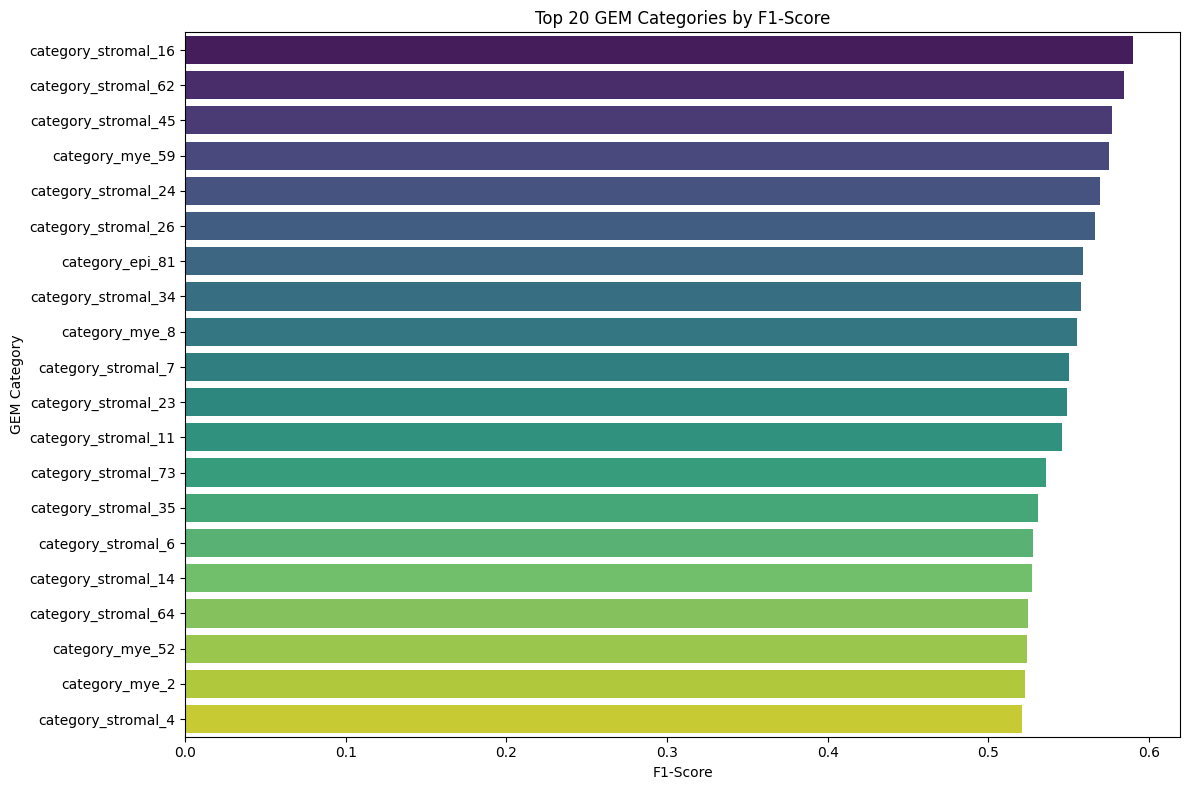

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the number of top categories to plot
N = 20  # Adjust N as needed

# Get the top N categories
top_f1_df = f1_df.head(N)

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a horizontal bar plot
sns.barplot(
    data=top_f1_df,
    x='F1_Score',
    y='GEM_Category',
    palette='viridis'
)

# Add labels and title
plt.xlabel('F1-Score')
plt.ylabel('GEM Category')
plt.title(f'Top {N} GEM Categories by F1-Score')

# Adjust layout to prevent labels from being cut off
plt.tight_layout()

# Show the plot
plt.show()
